# 02 - NumPy and Matplotlib

*KI-basierte Datenanalyse*, HFT Stuttgart, 2024 Summer Term, Michael Mommert (michael.mommert@hft-stuttgart.de)

This Notebook provides an introduction into NumPy and Matplotlib. This Notebook is based on material published in the book ["Python for Scientists", 3rd edition, James M. Stewart & Michael Mommert, Cambridge University Press](https://www.cambridge.org/us/universitypress/subjects/mathematics/computational-science/python-scientists-3rd-edition).

# NumPy

NumPy is Python's library for numerical math. Before we can use NumPy functionality, we have to import it.

We use the default way to import NumPy:

In [1]:
import numpy as np

## Arrays

Arrays are NumPy's workhorse. They are basically lists on steroids. 

Let's see what this means by doing a little experiment. We create a large list (and an array from the same list). Then we increment each element in the list and the array and measure the time it takes for this process (we use `%%timeit` cell magic for this measurement). Let's compare:

In [86]:
l = list(range(10000000))
l2 = []
a = np.array(l)

In [87]:
%%timeit
for i in l:
    l2.append(i+1)

224 ms ± 2.51 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [88]:
%%timeit
a2 = a+1

13.2 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Wow, using NumPy is way faster! Why is that? NumPy uses math libraries on your computer that are implemented in C. What happens is that you write code in Python, but under the hood, the code is executed in C, making it much faster!

The bottom line is: for math-heavy or data-heavy use cases, you should always try to use NumPy functionality. So let's learn how to use arrays.

### One-dimensional arrays

We can create an array from a list:

In [5]:
l = [1, 2, 3.0]
x = np.array(l)
x

array([1., 2., 3.])

While lists can consist of elements of different data types, all elements of the same array must have the same data type. To enforce this, arrays actually have a data type:

In [6]:
x.dtype

dtype('float64')

This allows us to easily convert an array of float values into an array of integers:

In [7]:
x.astype(int)

array([1, 2, 3])

Arrays also have a number of other useful attributes:

In [8]:
print(x.ndim)  # number of dimensions
print(x.size)  # size of the array
print(x.shape)  # shape of the array

1
3
(3,)


And arrays have useful methods:

In [9]:
x = np.linspace(0, 10, 11)
print(x.mean())     # mean of array
print(x.max())      # max of array
print(x.argmax())   # index of max element
print(x.clip(2, 6)) # clip array values to range [2,6]

5.0
10.0
10
[2. 2. 2. 3. 4. 5. 6. 6. 6. 6. 6.]


Slicing and indexing work on arrays just as on lists:

In [10]:
x[2:5], x[0]

(array([2., 3., 4.]), 0.0)

`np.linspace()` is a convenience function that creates an array of evenly spaced numbers: 

In [11]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

the `endpoint` option makes the stop value exclusive: 

In [12]:
np.linspace(0, 1, 10, endpoint=False)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

A different way to create a linearly spaced array is `np.arange()`:

In [13]:
np.arange(1, 10, 1)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

There are also convenience functions to create arrays full of zeros or ones:

In [14]:
print(np.zeros(5, dtype=float))
print(np.ones(5))

[0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1.]


### Basic array arithmetic

NumPy supports basic array arithmetic:

In [15]:
a = np.linspace(0, 1, 5)  
c = np.linspace(1, 3, 5)
print(a+c)
print(a*c)
print(a/c)

[1.   1.75 2.5  3.25 4.  ]
[0.    0.375 1.    1.875 3.   ]
[0.         0.16666667 0.25       0.3        0.33333333]


Note how these arithmetic operations are defined element-wise between the elements of two (or more) arrays of the same shape. In the same way, arithmetic operations are defined between arrays and scalar values:

In [16]:
a = np.linspace(0, 1, 5)
print(a*2)
print(a**2)
print(a/2)

[0.  0.5 1.  1.5 2. ]
[0.     0.0625 0.25   0.5625 1.    ]
[0.    0.125 0.25  0.375 0.5  ]


Here, the operation is defined between the scalar and each element of the array.

Arithmetic operations are also allowed between arrays of different shapes. The method behind this is called broadcasting. Let's look at an example:

In [17]:
a = np.array([[1, 2, 3], [4, 5, 6]])  
c = np.array([1, 2, 3])
print(a+c)
print(a*c)
print(a/c)

[[2 4 6]
 [5 7 9]]
[[ 1  4  9]
 [ 4 10 18]]
[[1.  1.  1. ]
 [4.  2.5 2. ]]


The broadcasting rule is as follows:

Each dimension is checked for compatibility, starting from the far-right one. Two dimensions are compatible if they are (1) equal or (2) if one of them is one. In the latter case, the smaller array is reshaped by repeating the pattern to match that dimension.

This sounds rather complicated, but you will get a feeling for it when playing with broadcasting.

### Two (and more)-dimensional arrays

Arrays can have any dimensionality you like. Two (and more)-dimensional arrays work the exact same way as one-dimensional arrays.

We can generate a two-dimensional array from a nested list:

In [18]:
x = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

What is the shape of `x`?

In [19]:
x.shape

(3, 4)

With the same method, we can also create higher dimensional arrays:

In [20]:
im = np.array([[[1, 0, 0], [1, 1, 0]],
               [[1, 0, 1], [0, 0, 1]]])
im.shape

(2, 2, 3)

Indexing and slicing works the exact same way as for one-dimensional arrays:

In [21]:
print(x[2])     # 3rd row
print(x[:,1])   # 2nd column
print(x[2][1])  # specific element
print(x[2,1])   # specific element

[ 8  9 10 11]
[1 5 9]
9
9


Note that NumPy uses matrix notation: the order of the indexing is row first, column second (as opposed to x, y).

Of course, we can use the same constructors that exist for one-dimensional arrays:

In [22]:
np.zeros((3, 3, 3))

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

### Array manipulations

We can `reshape()` a one-dimensional list into a multi-dimensional array:

In [23]:
np.reshape(range(6), (2,3))

array([[0, 1, 2],
       [3, 4, 5]])

naturally, this also works with more efficient ways to generate arrays:

In [24]:
np.reshape(np.linspace(0, 1.0, 9), (3, 3))

array([[0.   , 0.125, 0.25 ],
       [0.375, 0.5  , 0.625],
       [0.75 , 0.875, 1.   ]])

Of course, the original list or array must have a shape that is compatible with the output shape; if this is not the case, it will result in a `ValueError`.

The reshape() method also allows for a wildcard symbol (`-1`), which will figure out itself the length along one dimension:

In [25]:
np.reshape(np.arange(12), (-1, 3))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

We can `concatenate()` arrays if their shapes are compatible:

In [26]:
np.concatenate(([0, 1, 2], [3, 4], [5, 6, 7, 8], [9]))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

this also works for multi-dimensional arrays and a given axis if the shapes are compatible:

In [27]:
np.concatenate([[[1, 2, 3], [6, 7, 8]], [[4, 5], [9, 10]]], axis=1)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

we can `stack()` arrays:

In [28]:
np.stack([[[0, 1], [2, 3]], [[4, 5], [6, 7]], [[8, 9], [10, 11]]], axis=0)

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

if compatible, we can stack along a different axis:

In [29]:
np.stack([[[0, 1], [2, 3]], [[4, 5], [6, 7]], [[8, 9], [10, 11]]], axis=1)

array([[[ 0,  1],
        [ 4,  5],
        [ 8,  9]],

       [[ 2,  3],
        [ 6,  7],
        [10, 11]]])

... and yet another axis:

In [30]:
np.stack([[[0, 1], [2, 3]], [[4, 5], [6, 7]], [[8, 9], [10, 11]]], axis=2)

array([[[ 0,  4,  8],
        [ 1,  5,  9]],

       [[ 2,  6, 10],
        [ 3,  7, 11]]])

## Working with arrays

### Mathematical functions and operators

NumPy provides a wide range of mathematical functions and operators. These are called `ufunc`s as they can be applied to scalar values and arrays alike (in the case of arrays, they always work element-wise). We apply a simple ufunc to a scalar value:

In [31]:
np.sqrt(9)

3.0

we apply a simple ufunc to an array:

In [32]:
np.sqrt(np.arange(5))

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ])

### Sums and products

we can compute the overall `sum()` and we can sum along specific axes:

In [33]:
a = [[1, 2], [3, 4]]
print('sum over all elements:', np.sum(a))
print('sum over rows:', np.sum(a, axis=0))
print('sum over columns:', np.sum(a, axis=1))

sum over all elements: 10
sum over rows: [4 6]
sum over columns: [3 7]


### Advanced array indexing

We can test for conditions in arrays, e.g., whether elements of the array are greater than 3:

In [34]:
x = np.linspace(1, 5, 5)
x > 3

array([False, False, False,  True,  True])

As you can see, the output is an array of Boolean values, indicating the outcome of the comparison for each element of the array. This is called a logical array. 

We can use logical arrays for indexing:

In [35]:
x[(x>1) & (x<4)]

array([2., 3.])

### Sorting and searching

we can `sort()` arrays:

In [36]:
x = np.array([4, 1, 7, 2, 9, 3])
np.sort(x)

array([1, 2, 3, 4, 7, 9])

we can retrieve a sorted index order with `argsort()`:

In [37]:
z = np.argsort(x)
print('indices:', z)
print('ordered array:', x[z])

indices: [1 3 5 0 2 4]
ordered array: [1 2 3 4 7 9]


## Random numbers

we can generate random numbers with a random number generator (rng, results may vary):

In [38]:
from numpy.random import default_rng

rng = default_rng()
rng.random()

0.8971601514577957

we can generate arrays of random numbers (between 0 and excluding 1, results may vary):

In [39]:
rng.random(3)

array([0.0895466 , 0.00231206, 0.25880853])

and, of course, we can generate multi-dimensional arrays of random numbers (results may vary):

In [40]:
rng.random((3, 3))

array([[0.74654013, 0.43390387, 0.29978686],
       [0.08230096, 0.27307812, 0.29672406],
       [0.4411359 , 0.27914135, 0.36868097]])

we can scale the random numbers to a different range easily (results may vary):

In [41]:
5 + rng.random(3)*15

array([15.90066939, 11.57360063, 19.96332518])

we can also generate a random array of integers (results may vary):

In [42]:
rng.integers(low=10, high=100, size=(3,3))

array([[33, 21, 17],
       [33, 23, 71],
       [96, 67, 40]])

we can generate an array of normally distributed random numbers (results may vary):

In [43]:
rng.normal(loc=5, scale=1, size=10)

array([6.49832686, 3.57630819, 6.23377532, 3.26827666, 4.79238518,
       3.53290942, 5.07872821, 5.86044845, 5.75551579, 5.43894855])

we can set a seed value of a random number generator:

In [44]:
rng_seeded = default_rng(42)

now, it will generate random numbers always in the same order:

In [45]:
rng_seeded.random(3)

array([0.77395605, 0.43887844, 0.85859792])

this also applies when generating random numbers, one at a time:

In [46]:
rng_seeded = default_rng(42)

for i in range(3):
    print(rng_seeded.random())

0.7739560485559633
0.4388784397520523
0.8585979199113825


## Simple statistics

we derive the `max()` element of an array: 

In [47]:
x = np.array([[5,4,1], [7,3,2]])
np.max(x)

7

we can do the same along individual axes:

In [48]:
print('axis=0:', np.max(x, axis=0))
print('axis=1:', np.max(x, axis=1))

axis=0: [7 4 2]
axis=1: [5 7]


we can also compute the `average()` of an array:

In [49]:
x = [3.1, 2.7, 2.5, 3.1, 2.9]
xerr = np.array([0.05, 0.15, 0.6, 0.1, 0.05])
print('unweighted:', np.average(x))
print('weighted:', np.average(x, weights=1/xerr**2))

unweighted: 2.8600000000000003
weighted: 2.995014662756598


we can compute a `histogram()` (results may vary):

In [50]:
x = np.random.normal(size=100)
hist, bins = np.histogram(x, 10)
print('hist:', hist)
print('bins:', bins)

hist: [ 3 11 16 14 25 17  8  5  0  1]
bins: [-2.06252318 -1.55377576 -1.04502834 -0.53628092 -0.02753351  0.48121391
  0.98996133  1.49870874  2.00745616  2.51620358  3.02495099]


we can also define the bin edges manually (results may vary): 

In [51]:
hist, bins = np.histogram(x, [-3, -1, 0, 1, 3])
print('hist:', hist)
print('bins:', bins)

hist: [15 32 39 13]
bins: [-3 -1  0  1  3]


instead of returning a frequency, we can force `histogram()` to compute a density (results may vary):

In [52]:
hist, bins = np.histogram(x, [-3, -1, 0, 1, 3], density=True)
print('hist:', hist)
print('sum over hist:', np.sum(hist*(bins[1:]-bins[:-1])))

hist: [0.07575758 0.32323232 0.39393939 0.06565657]
sum over hist: 1.0


we can also `correlate()` two arrays:

In [53]:
np.correlate([1, 2, 3], [4, 5, 6])

array([32])

and we can compute the Pearson product-moment correlation coefficients:

In [54]:
np.corrcoef([1, 2, 3], [4, 5, 6])

array([[1., 1.],
       [1., 1.]])

and we can compute the covariance matrix between two arrays:

In [55]:
np.cov([1, 2, 3], [4, 5, 6])

array([[1., 1.],
       [1., 1.]])

# Matplotlib

Matplotlib is Python's plotting library. We will introduce some basic concepts and plotting methods.

In [56]:
import matplotlib.pyplot as plt

## A simple figure

We create a simple figure that plots the function $sin(x) + sin(3x)/3$:

Text(0.5, 1.0, 'A simple plot')

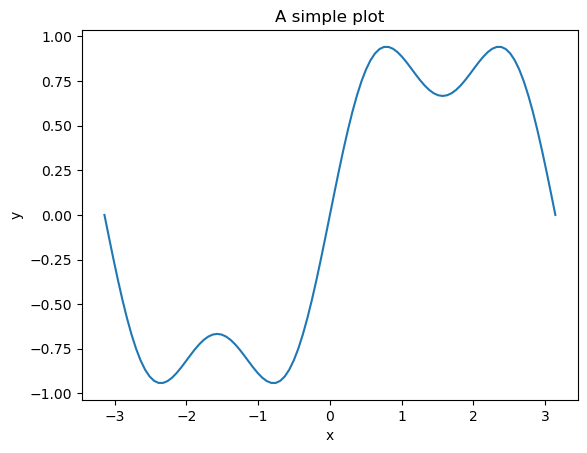

In [57]:
x = np.linspace(-np.pi, np.pi, 101)  # create some x values
y = np.sin(x) + np.sin(3*x)/3.0      # compute function values for all x

plt.plot(x, y)               # plot the line
plt.xlabel('x')              # put a label on the x-axis
plt.ylabel('y')              # put a label on the y-axis
plt.title('A simple plot')   # put a title on the plot

That was easy. The actual plotting function only takes a single line of code. 

Note that Matplotlib plots values, not functions: you always have to provide a set of x and y coordinates to the plotting routine. If you would like to plot a function, you first have to generate x and y values (as shown above).

If you are only interested in plotting very simple plots like the one shown above, we can stop here. If you would like to learn how to customize your plots and how to plot more complex things than just a line, please read on.

## Object-orientied Matplotlib

Matplotlib provides an object-oriented approach, which we will introduce in the following. The formalism that we used above (`plt.plot()`) is actually just a wrapped around this object-oriented approach.

Let's start by creating a Figure with two Axes objects:

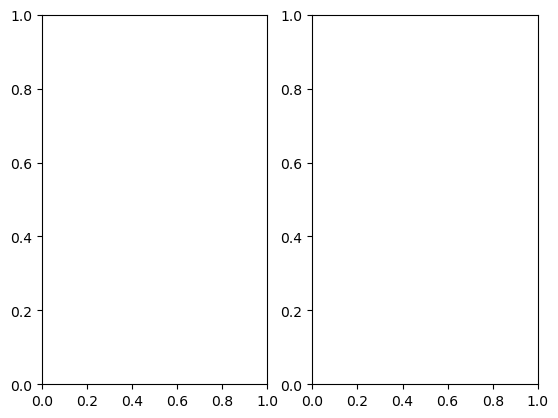

In [58]:
fig, ax = plt.subplots(1, 2)

A Figure is like the frame of your plot. Everything you would like to include in your plot (even separate panels), must be part of a Figure.

An Axes object is the canvas on which you can plot, draw and write. You can think of each panel of a composite plot as its own Axes object.

In this specific case, we created two Axes objects:

In [59]:
ax.shape

(2,)

We can now recreate the same plot from above in an object-oriented way:

Text(0.5, 1.0, 'A simple plot')

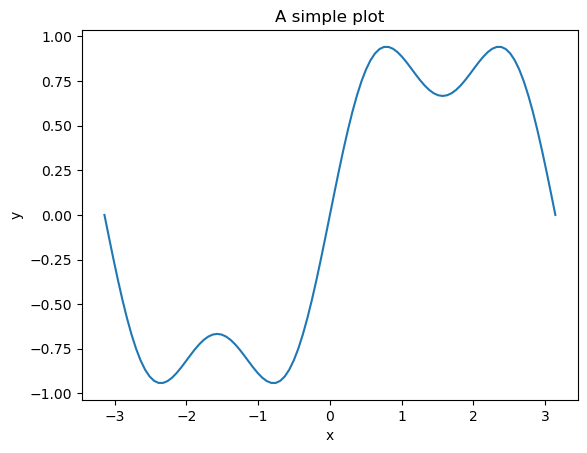

In [60]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple plot')

## Customizing plots

Now that we introduced object-oriented plotting, you will learn how to customize you plot. There are myriads of ways to do so. 


### Axis range and scaling

We can easily set the range on the x-axis:

(-2.0, 2.0)

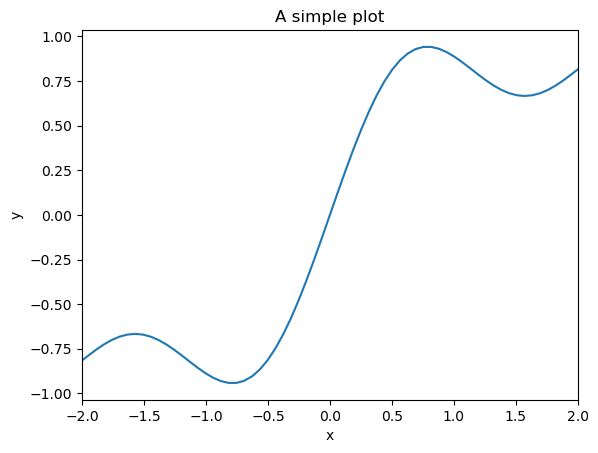

In [61]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple plot')

ax.set_xlim(-2, 2)

We can also use a logarithmic scaling for the y-axis:

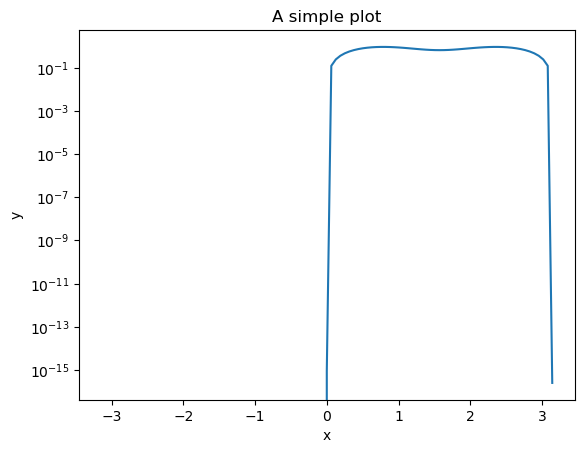

In [62]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple plot')

ax.set_yscale('log')

(of course, both methods also apply to the opposite axis)

### Ticks

We can customize ticks and tick labels:

Text(0, 0.5, 'Temperature (C)')

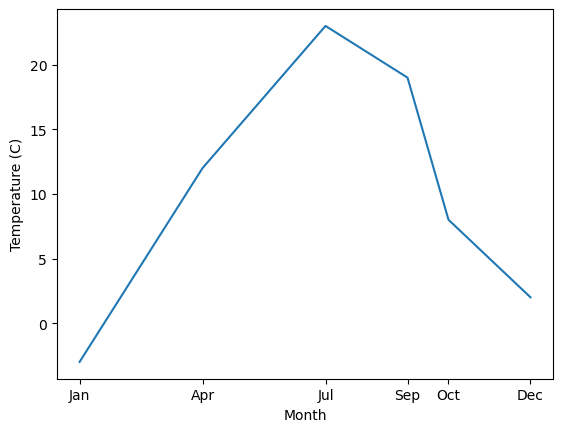

In [63]:
months = [1, 4, 7, 9, 10, 12]
temp = [-3, 12, 23, 19, 8, 2]

fig, ax = plt.subplots()
ax.plot(months, temp)
ax.set_xticks(months)
ax.set_xticklabels(['Jan', 'Apr', 'Jul', 'Sep', 'Oct', 'Dec'])
ax.set_xlabel('Month')
ax.set_ylabel('Temperature (C)')

### Legend

Labeling different curves in a plot provides better readibility:

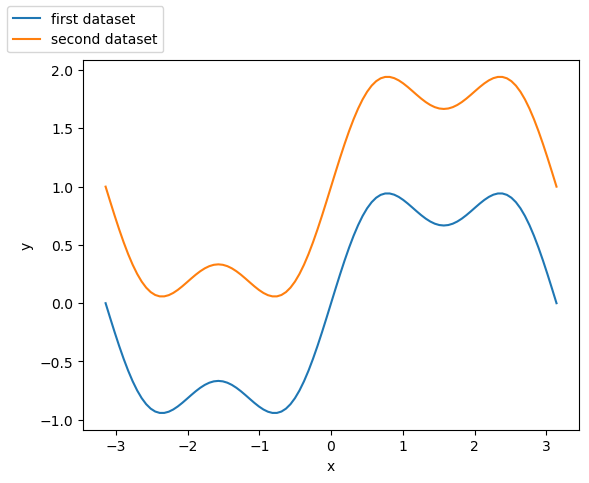

In [64]:
fig, ax = plt.subplots()
ax.plot(x, y, label='first dataset')
ax.plot(x, y+1, label='second dataset')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.legend(loc='upper left')

### Transparency

We can also use transparency to create semi-transparent lines or symbols:

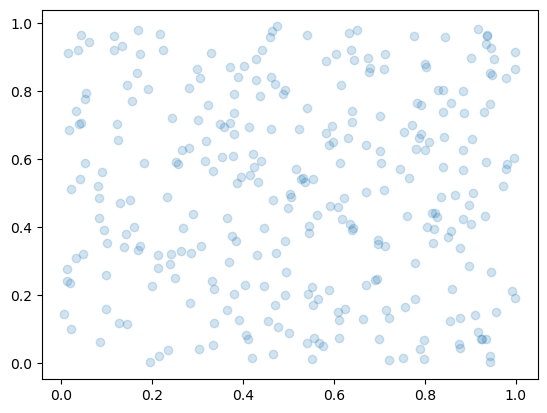

In [65]:
fig, ax = plt.subplots()
ax.scatter(np.random.rand(300), np.random.rand(300), alpha=0.2)

### Text and annotations

We can also add text into our plot:

Text(0.5, -0.5, 'this is a large\ntext label')

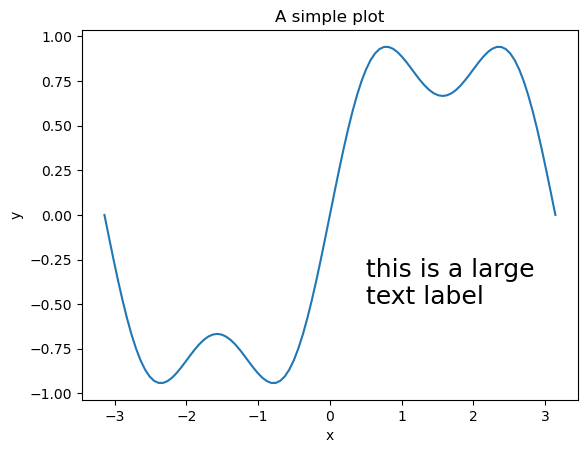

In [66]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('A simple plot')

ax.text(0.5, -0.5, 'this is a large\ntext label', fontsize=18)

... and annotate positions with arrows:

Text(0.8, 0.5, 'point of inflection at x=1')

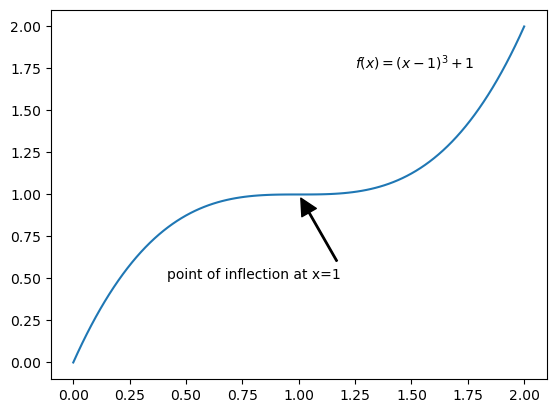

In [67]:
x = np.linspace(0, 2, 101)
y = (x-1)**3 + 1

fig, ax = plt.subplots()
ax.plot(x, y)
ax.text(1.25, 1.75, r'$f(x)=(x-1)^3+1$')
ax.annotate('point of inflection at x=1', xy=(1,1),
               xytext=(0.8,0.5), horizontalalignment='center',
               arrowprops=dict(facecolor='black',width=1, shrink=0.05))

### Color maps and color bars

Matplotlib provides a range of colors and colormaps. Colormaps are used to encode additional information into the color of your symbols:

Text(0, 0.5, 'y')

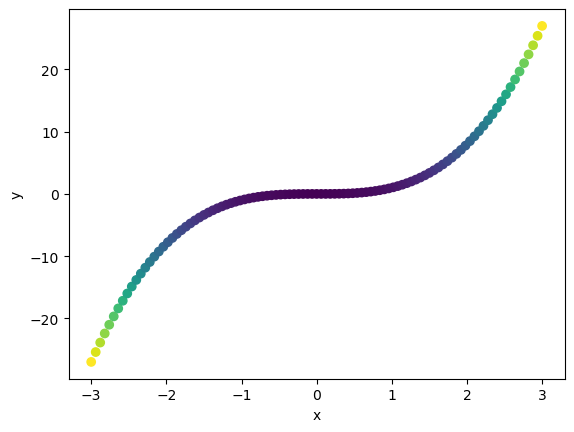

In [68]:
x = np.linspace(-3, 3, 101)
y = x**3
r = np.sqrt(x**2 + y**2)  # Euclidean distance

fig, ax = plt.subplots()
ax.scatter(x, y, c=r)
ax.set_xlabel('x')
ax.set_ylabel('y')

Here we have a more complex example involving a 3d surface and plotting a colorbar:

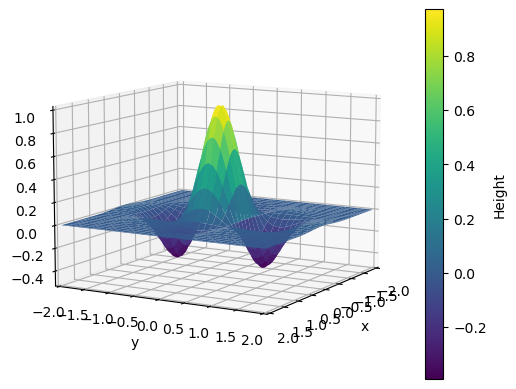

In [69]:
xx, yy = np.mgrid[-2:2:101j, -2:2:101j]
zz = np.exp(-2*xx**2-yy**2)*np.cos(2*xx)*np.cos(3*yy)

fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax.plot_surface(xx, yy, zz, cmap=plt.get_cmap('viridis'), linewidth=0)
cbar = plt.colorbar(surf, label='Height')
ax.set_xlim3d(-2.0, 2.0)
ax.set_ylim3d(-2.0, 2.0)
ax.set_zlim3d(-0.5, 1.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.elev, ax.azim = 10, 30

## Cartesian plots

Many common plots can be plotted in cartesian coordinates. We showcase a selection here:

### Line plots

we create some data:

In [70]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
z = np.cos(x)

we plot both `y` and `z` on the same axis:

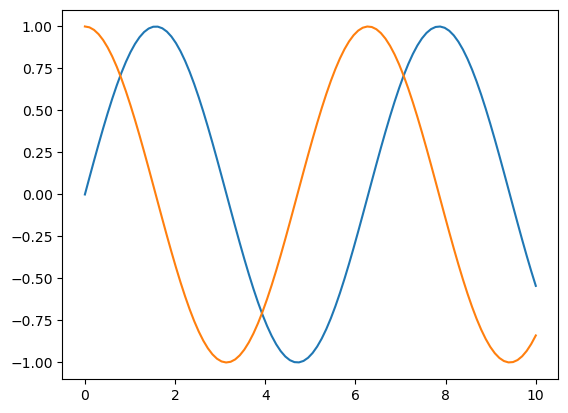

In [71]:
f, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, z)

we can define line colors:

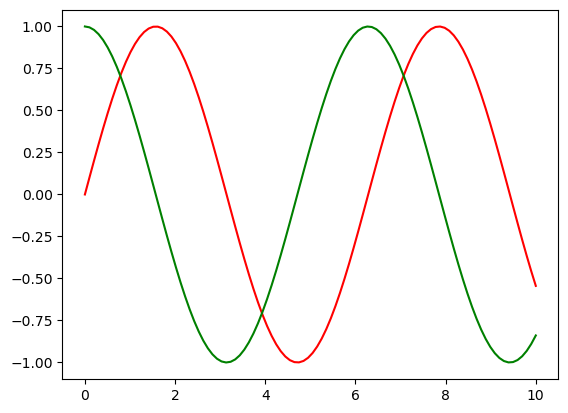

In [72]:
f, ax = plt.subplots()
ax.plot(x, y, color='red')
ax.plot(x, z, color='green')

we can define line styles and line widths:

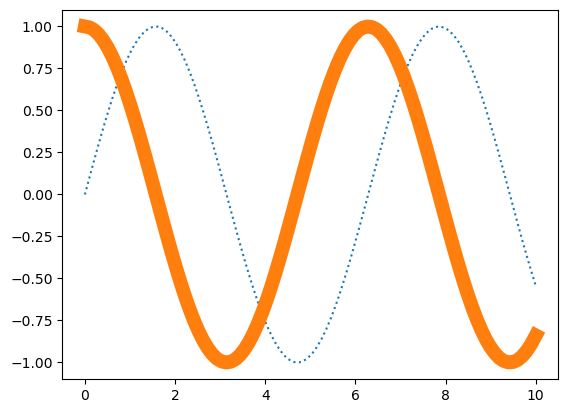

In [73]:
f, ax = plt.subplots()
ax.plot(x, y, linestyle='dotted')
ax.plot(x, z, linewidth=10)

we can combine different customizations:

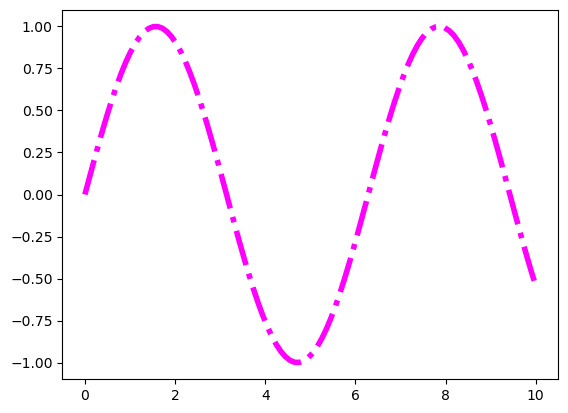

In [74]:
fig, ax = plt.subplots()
ax.plot(x, y, color='magenta', linestyle='dashdot', linewidth=4)

### Scatter plots

a simple scatter plot showing 3 clusters:

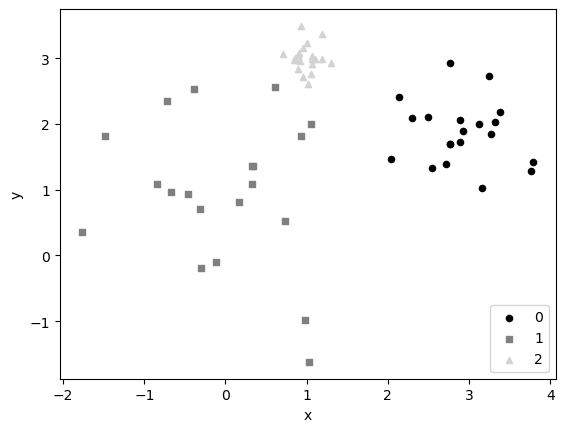

In [75]:
np.random.seed(42)

fig, ax = plt.subplots()

for i in range(3):
    x = np.random.normal(loc=[3, 0, 1][i],
                         scale=[0.5, 1, 0.2][i], size=20)
    y = np.random.normal(loc=[2, 1, 3][i],
                         scale=[0.5, 1, 0.2][i], size=20)
    ax.scatter(x, y, marker=['o', 's', '^'][i], s=20,
               color=['black', 'grey', 'lightgrey'][i],
               label=i)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc=4)

### Error bars

we can visualize errors or uncertainties with error bars:

<ErrorbarContainer object of 3 artists>

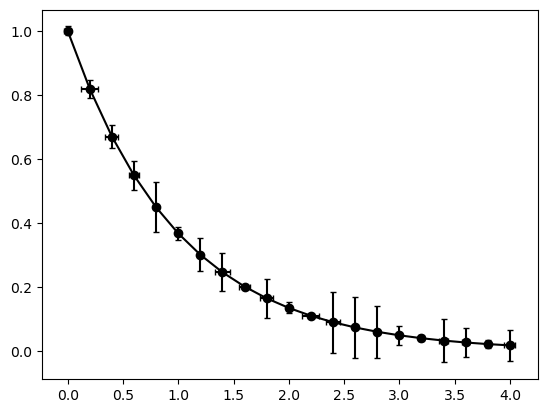

In [76]:
np.random.seed(42)
x = np.linspace(0, 4, 21)
y = np.exp(-x)
xe = 0.08*np.random.rand(len(x))
ye = 0.1*np.random.rand(len(y))

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=xe, yerr=ye, marker='o', capsize=2, 
            color='black')

### Plotting filled areas

we can visualize the same errors or uncertainties also with filled areas:

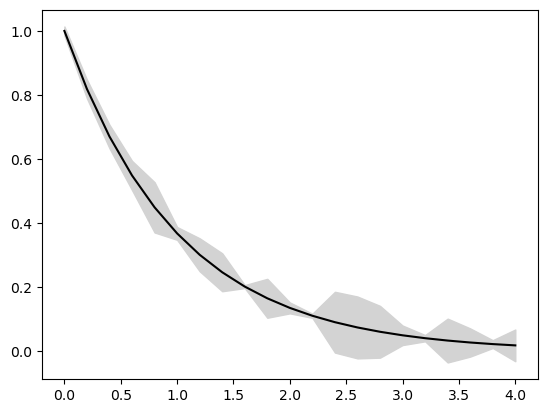

In [77]:
fig, ax = plt.subplots()
ax.fill_between(x, y+ye, y-ye, color='lightgrey')
ax.plot(x, y, color='black')

### Bar plots

we can create a stacked bar plot:

Text(0, 0.5, 'Frequency')

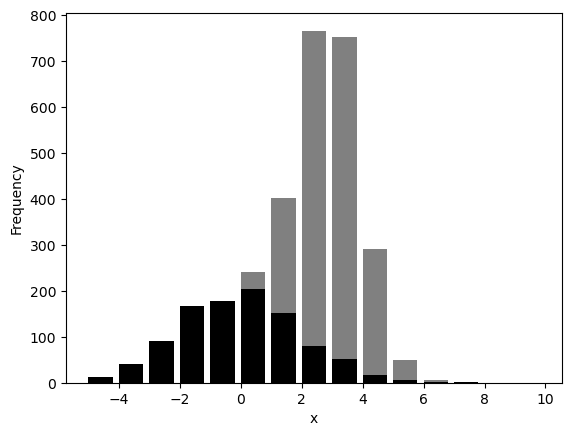

In [78]:
np.random.seed(42)
x1 = np.random.normal(loc=0, scale=2, size=1000)
x2 = np.random.normal(loc=3, scale=1, size=2000)
hist1, bins = np.histogram(x1, bins=np.linspace(-5, 10, 16))
hist2, bins = np.histogram(x2, bins=np.linspace(-5, 10, 16))

fig, ax = plt.subplots()
ax.bar(bins[:-1], hist1, align='edge', width=0.8,
       color='black')
ax.bar(bins[:-1], hist2, bottom=hist1, align='edge', 
       width=0.8, color='grey')
ax.set_xlabel('x')
ax.set_ylabel('Frequency')

## Plotting images

We load an image from file (using the Python Image Library, Pillow) and look at its properties:

In [79]:
from PIL import Image

im = np.array(Image.open('racoon.png').convert('RGB'))  # read file and convert to RGB
print(im.shape)
print(np.min(im), np.max(im))

(218, 291, 3)
0 254


we use imshow to display the image:

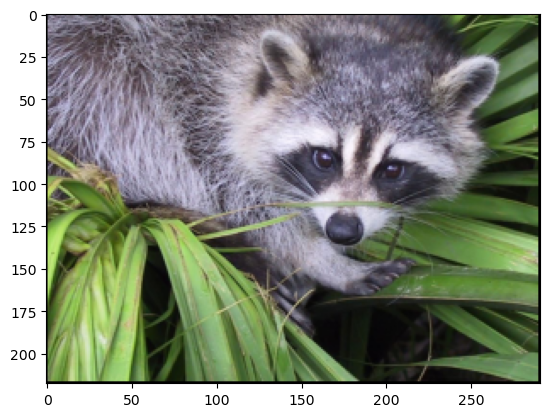

In [80]:
fig, ax = plt.subplots()
ax.imshow(im)

we extract the RGB values of a single pixel (mind the notation: image coordinates are provided in rows, columns):

In [81]:
im[200, 100]

array([135, 175, 123], dtype=uint8)

You see that the green value for this pixel is very high. Where is it located?

We can extract individual color channels:

In [82]:
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

we can combine individual channels into a RGB image:

In [83]:
im2 = np.dstack([r, g, b])
im2.shape

(218, 291, 3)

Let's plot the individual color channels:

Text(0.5, 1.0, 'B')

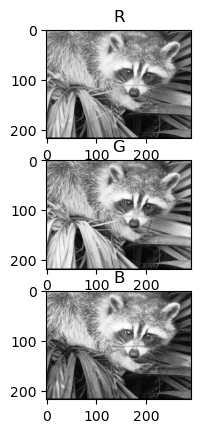

In [84]:
fig, ax = plt.subplots(3, 1)
ax[0].imshow(r, cmap='Greys_r')
ax[0].set_title('R')
ax[1].imshow(g, cmap='Greys_r')
ax[1].set_title('G')
ax[2].imshow(b, cmap='Greys_r')
ax[2].set_title('B')

## Compound figures

here we create a compound figure, consisting of 4 panels; note how each panel is addressed separately:

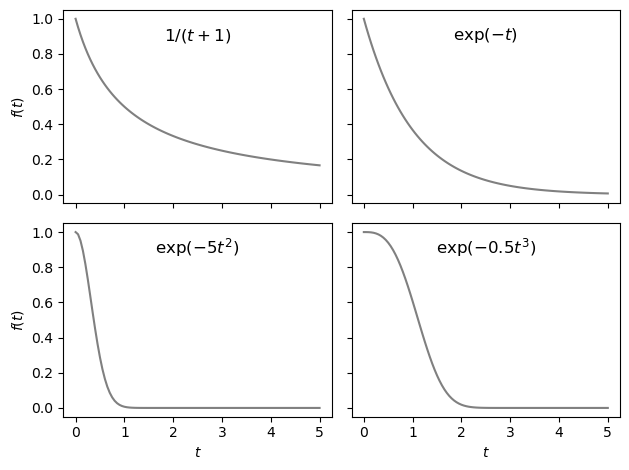

In [85]:
t = np.linspace(0,5,101)
y1 = 1.0/(t+1.0)
y2 = np.exp(-t)
y3 = np.exp(-5*t**2)
y4 = np.exp(-0.5*t**3)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# top left axes
ax[0, 0].plot(t, y1, color='grey')
ax[0, 0].set_ylabel(r'$f(t)$')
ax[0, 0].set_title(r'$1/(t+1)$', y=0.8)
# top right axes
ax[0, 1].plot(t, y2, color='grey')
ax[0, 1].set_title(r'$\exp(-t)$', y=0.8)
# bottom left axes
ax[1, 0].plot(t, y3, color='grey')
ax[1, 0].set_xlabel(r'$t$')
ax[1, 0].set_ylabel(r'$f(t)$')
ax[1, 0].set_title(r'$\exp(-5t^2)$', y=0.8)
# bottom right axes
ax[1, 1].plot(t, y4, color='grey')
ax[1, 1].set_xlabel(r'$t$')
ax[1, 1].set_title(r'$\exp(-0.5t^3)$', y=0.8)
fig.subplots_adjust(hspace=0.1, wspace=0.1)
fig.tight_layout()